**Лабораторная работа 2**


*Выполнила Жолнерович Арина Николаевна Б03-202в*

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import math
import os
from PIL import Image

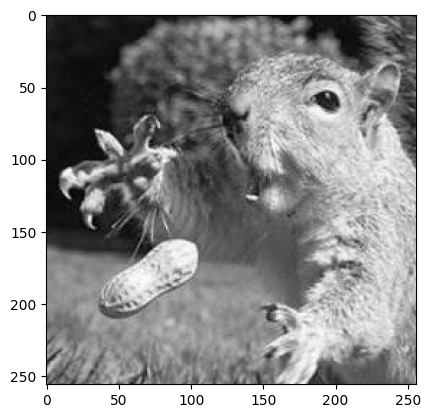

In [17]:
img=cv2.imread('Task3.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')
img = img

In [18]:
def compressRatio(pic, num):
    original_size = os.path.getsize('Task3.jpg')
    
    pic_name = f"pic{num}.jpg"
    pic = Image.fromarray(pic.astype(np.uint8))
    pic.save(pic_name)
    pic_size = os.path.getsize(pic_name)
    coeff = original_size / pic_size
    
    return coeff


In [19]:
def directDCT(A):
    B=np.zeros((A.shape[0],A.shape[1]))
    for p in range(A.shape[0]):
        if p==0:
            a=1/np.sqrt(A.shape[0])
        else:
            a=np.sqrt(2/A.shape[0])
        for q in range(A.shape[1]):
            if q==0:
                b=1/np.sqrt(A.shape[1])
            else:
                b=np.sqrt(2/A.shape[1])

            w=0
            for m in range(A.shape[0]):
                for n in range(A.shape[1]):
                    w+=A[m,n]*np.cos((np.pi*(2*m+1)*p)/(2*A.shape[0]))*np.cos((np.pi*(2*n+1)*q)/(2*A.shape[1]))
            B[p,q]=w*a*b
    return B

In [20]:
def invertDCT(B):
    A=np.zeros((B.shape[0],B.shape[1]))
    for m in range(B.shape[0]):
        for n in range(B.shape[1]):
            w=0
            for p in range(B.shape[0]):
                if p==0:
                    a=1/np.sqrt(B.shape[0])
                else:
                    a=np.sqrt(2/B.shape[0])
                for q in range(B.shape[1]):
                    if q==0:
                        b=1/np.sqrt(B.shape[1])
                    else:
                        b=np.sqrt(2/B.shape[1])

                    w+=a*b*B[p,q]*np.cos((np.pi*(2*m+1)*p)/(2*B.shape[0]))*np.cos((np.pi*(2*n+1)*q)/(2*B.shape[1]))
            A[m,n]=w
    return A

In [21]:
C_mix=[[3,5,7,9,11,13,15,17],[5,7,9,11,13,15,17,19],[7,9,11,13,15,17,19,21],[9,11,13,15,17,19,21,23],[11,13,15,17,19,21,23,25],[13,15,17,19,21,23,25,27],[15,17,19,21,23,25,27,29],[17,19,21,23,25,27,29,31]]

In [22]:
masks = [np.zeros((8, 8)) for _ in range(12)]
masks[0]=[[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,0]]
masks[1]=[[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,0],
[1,1,1,1,1,1,0,0]]
masks[2]=[[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,0],
[1,1,1,1,1,1,0,0],
[1,1,1,1,1,0,0,0]]
masks[3]=[[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,0],
[1,1,1,1,1,1,0,0],
[1,1,1,1,1,0,0,0],
[1,1,1,1,0,0,0,0]]
masks[4]=[[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,0],
[1,1,1,1,1,1,0,0],
[1,1,1,1,1,0,0,0],
[1,1,1,1,0,0,0,0],
[1,1,1,0,0,0,0,0]]
masks[5]=[[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,0],
[1,1,1,1,1,1,0,0],
[1,1,1,1,1,0,0,0],
[1,1,1,1,0,0,0,0],
[1,1,1,0,0,0,0,0],
[1,1,0,0,0,0,0,0]]
masks[6]=[[1,1,1,1,1,1,1,1],
[1,1,1,1,1,1,1,0],
[1,1,1,1,1,1,0,0],
[1,1,1,1,1,0,0,0],
[1,1,1,1,0,0,0,0],
[1,1,1,0,0,0,0,0],
[1,1,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0]]
masks[7]=[[1,1,1,1,1,1,1,0],
[1,1,1,1,1,1,0,0],
[1,1,1,1,1,0,0,0],
[1,1,1,1,0,0,0,0],
[1,1,1,0,0,0,0,0],
[1,1,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0]]
masks[8]=[[1,1,1,1,1,1,0,0],
[1,1,1,1,1,0,0,0],
[1,1,1,1,0,0,0,0],
[1,1,1,0,0,0,0,0],
[1,1,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0]]
masks[9]=[[1,1,1,1,1,0,0,0],
[1,1,1,1,0,0,0,0],
[1,1,1,0,0,0,0,0],
[1,1,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0]]
masks[10]=[[1,1,1,1,0,0,0,0],
[1,1,1,0,0,0,0,0],
[1,1,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0]]
masks[11]=[[1,1,1,0,0,0,0,0],
[1,1,0,0,0,0,0,0],
[1,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0]]

In [23]:
def iteration(D, iterat):
    return D*masks[iterat]

In [24]:
compression=np.zeros(12) #уровень сжатия
for iterat in range(0, 12):
    compr_pic=np.zeros((img.shape[0],img.shape[1]))
    for i in range(0,img.shape[0],8):
        for j in range(0,img.shape[1],8):
            A=img[i:i+8, j:j+8]
            #прямое ДКП
            B=directDCT(A)
            #применили матрицу квантования
            D=B/C_mix
            #обнулили коэффициенты ДКП согласно номеру итерации
            new_D=iteration(D, iterat)
            #обратное квантование
            new_B=new_D*C_mix
            #обратное ДКП
            new_A=invertDCT(new_B)
            compr_pic[i:i+8, j:j+8]=new_A
    compression[iterat]=compressRatio(compr_pic, iterat)

In [25]:
compression

array([0.99954638, 1.00007564, 0.99811264, 0.99781132, 1.0001513 ,
       1.00273038, 1.02440725, 1.07208887, 1.16474319, 1.36032514,
       1.6676337 , 2.20681022])

*Графики*

In [26]:
quality=np.zeros(12) # качество определим из корелляции полученных изображений с исходным
for p in range(12):
    pic=cv2.imread(f"pic{p}.jpg")
    pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    quality[p] = np.corrcoef(img.flatten(), pic.flatten())[0, 1]

In [27]:
use_coeff=[1,3,6,10,15, 21,28,36,43,49,54,58] #количнество задействованных коэффициентов

*Зависимость между количеством задействованных коэффициентов и качеством изображения*

<function matplotlib.pyplot.show(close=None, block=None)>

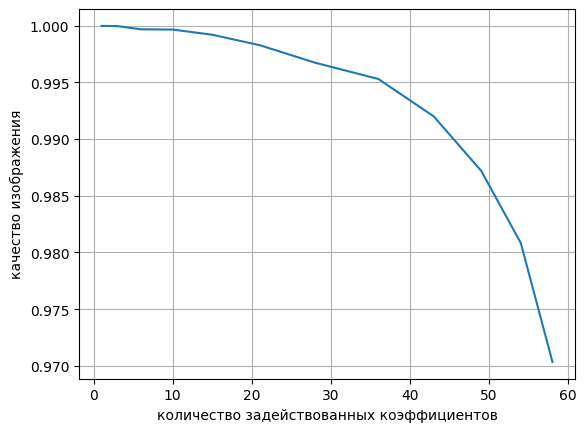

In [38]:
plt.plot(use_coeff, quality)
plt.grid()
#plt.title('Зависимость между количеством задействованных коэффициентов и качеством изображения')
plt.xlabel('количество задействованных коэффициентов')
plt.ylabel('качество изображения')
plt.savefig('График_a.png')
plt.show

*Зависимость между уровнем сжатия и качеством изображения*

<function matplotlib.pyplot.show(close=None, block=None)>

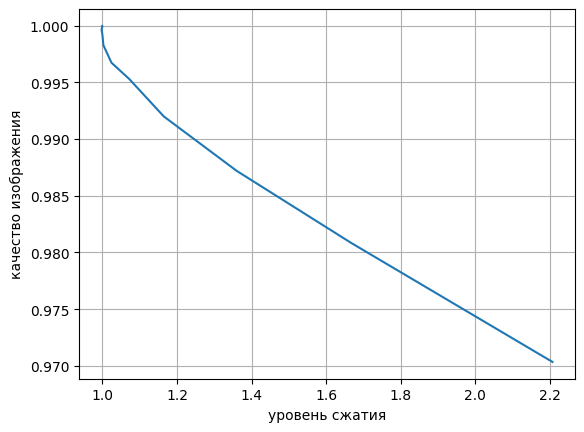

In [37]:
plt.plot(compression, quality)
plt.grid()
#plt.title('Зависимость между уровнем сжатия и качеством изображения')
plt.xlabel('уровень сжатия')
plt.ylabel('качество изображения')
plt.savefig('График_б.png')
plt.show